# Trabajo semanal N8

## Parte 1: Matriz admitancia indefinida




## Parte 2: Filtros digitales

### Emular digitalmente un filtro Butterworth de orden 2 $ f_c = 1KHz $

La transferencia normalizada del filtro propuesto es:

$$ H_{(s)} = \frac{1}{s^2+\frac{s}{Q}+1} $$

Y aplicando la transformación $s = k\frac{z-1}{z+1}$ se obtiene $H_{(z)}$


In [2]:
import sympy as sp
from splane import pzmap, bodePlot
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

s, z = sp.symbols('s z', complex=True)
k, fs, Q, Om, fc = sp.symbols('k fs Q Om fc', real=True, positive=True)

Ts = fc**2/(s**2+s*fc/Q+fc**2)
fz = k * (z-1)/(z+1)

Tz = sp.collect(sp.simplify(sp.expand(Ts.subs(s, fz))), z)

display(Tz)

Q*fc**2*(z + 1)*(z**2 + 2*z + 1)/(Q*fc**2*(z + 1)*(z**2 + 2*z + 1) + Q*k**2*(z + 1)*(z**2 - 2*z + 1) + fc*k*(z - 1)*(z**2 + 2*z + 1))

Si $ k = 2f_s \wedge f_s = 100kHz $ y además se tiene un $ Q = \frac{1}{\sqrt{2}} $ correspondiente a un filtro Butter de segundo orden

(2,
 array([<AxesSubplot:title={'center':'Magnitude response'}, ylabel='Magnitude [dB]'>,
        <AxesSubplot:title={'center':'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [rad]'>],
       dtype=object))

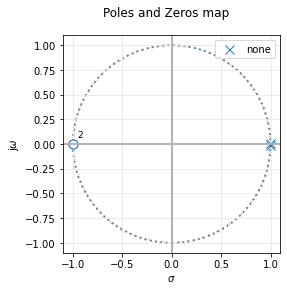

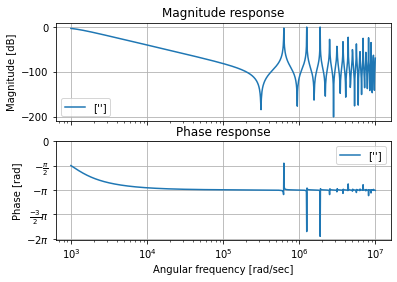

In [2]:
fs = 100000
fc = 1000
Q = np.sqrt(2)/2
k = 2*fs

kz2 = Q * k**2  + Q*fc**2 + k*fc
kz1 = -2 * Q * k**2 + 2 * Q * fc**2
kz0 = Q * k**2  + Q * fc**2 - k*fc

numz =  Q * fc**2 * np.array([1, 2, 1])
denz =  np.array([kz2, kz1, kz0])

my_df = sig.TransferFunction(numz, denz, dt=1/fs)
        
pzmap(my_df, annotations = False,  fig_id=1)
        
bodePlot(my_df, fig_id=2)


### b) Se cambia la $ f_s $ a 10kHz y se analiza nuevamente

(2,
 array([<AxesSubplot:title={'center':'Magnitude response'}, ylabel='Magnitude [dB]'>,
        <AxesSubplot:title={'center':'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [rad]'>],
       dtype=object))

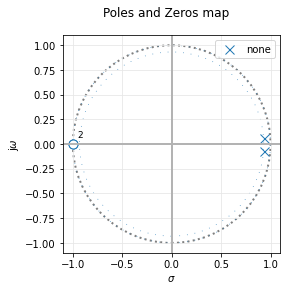

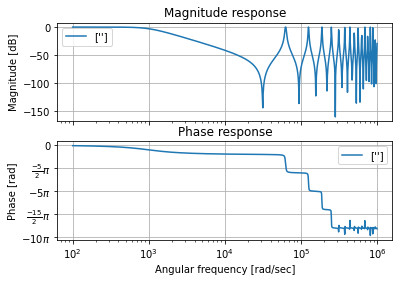

In [6]:
fs = 10000
k = 2*fs

kz2 = Q * k**2  + Q*fc**2 + k*fc
kz1 = -2 * Q * k**2 + 2 * Q * fc**2
kz0 = Q * k**2  + Q * fc**2 - k*fc

numz =  Q * fc**2 * np.array([1, 2, 1])
denz =  np.array([kz2, kz1, kz0])

my_df = sig.TransferFunction(numz, denz, dt=1/fs)
        
pzmap(my_df, annotations = False,  fig_id=1)
        
bodePlot(my_df, fig_id=2)



### c) $ f_c = 6kHz \wedge f_s = 100kHz $

(2,
 array([<AxesSubplot:title={'center':'Magnitude response'}, ylabel='Magnitude [dB]'>,
        <AxesSubplot:title={'center':'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [rad]'>],
       dtype=object))

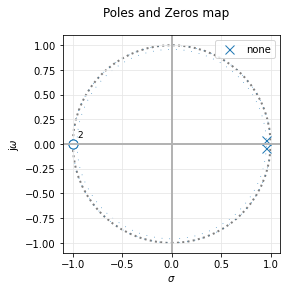

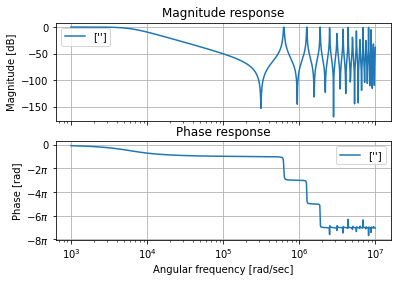

In [7]:
fc = 6000
fs = 100000
k = 2*fs

kz2 = Q * k**2  + Q*fc**2 + k*fc
kz1 = -2 * Q * k**2 + 2 * Q * fc**2
kz0 = Q * k**2  + Q * fc**2 - k*fc

numz =  Q * fc**2 * np.array([1, 2, 1])
denz =  np.array([kz2, kz1, kz0])

my_df = sig.TransferFunction(numz, denz, dt=1/fs)
        
pzmap(my_df, annotations = False,  fig_id=1)
        
bodePlot(my_df, fig_id=2)


### $ f_c = 6kHz \wedge f_s = 10kHz $

(2,
 array([<AxesSubplot:title={'center':'Magnitude response'}, ylabel='Magnitude [dB]'>,
        <AxesSubplot:title={'center':'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [rad]'>],
       dtype=object))

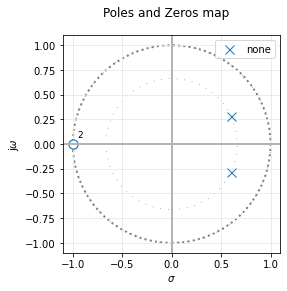

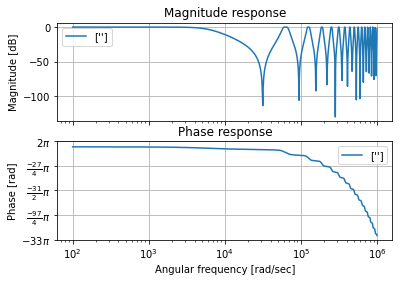

In [8]:
fs = 10000
k = 2*fs

kz2 = Q * k**2  + Q*fc**2 + k*fc
kz1 = -2 * Q * k**2 + 2 * Q * fc**2
kz0 = Q * k**2  + Q * fc**2 - k*fc

numz =  Q * fc**2 * np.array([1, 2, 1])
denz =  np.array([kz2, kz1, kz0])

my_df = sig.TransferFunction(numz, denz, dt=1/fs)
        
pzmap(my_df, annotations = False,  fig_id=1)
        
bodePlot(my_df, fig_id=2)


Para este último caso debería usarse un filtro de prewarping para que las transferencias de los filtros analógico y digital tengan la misma caída (-3dB) en la frecuencia de corte, el filtro es necesario porque la frecuencia de corte del filtro pasa bajos y la frecuencia de muestreo están muy próximas ($f_c > \frac{1}{4}f_s$)

### Filtro de media móvil


$ h_{1(k)} = [1,1] $

$ H_{1(z)} = 1+z^{-1} = \frac{z+1}{z} $




(2,
 array([<AxesSubplot:title={'center':'Magnitude response'}, ylabel='Magnitude [dB]'>,
        <AxesSubplot:title={'center':'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [rad]'>],
       dtype=object))

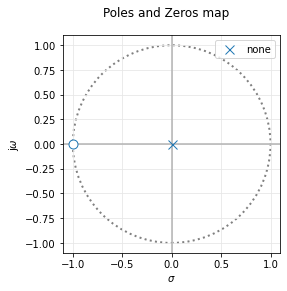

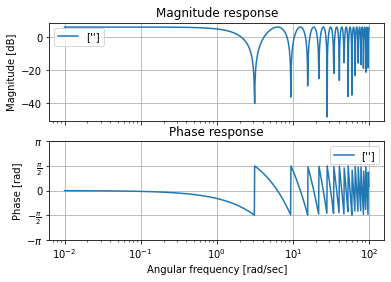

In [12]:
fs = 1

numz =  np.array([1, 1])
denz =  np.array([1, 0])

my_df = sig.TransferFunction(numz, denz, dt=1/fs)
        
pzmap(my_df, annotations = False,  fig_id=1)
        
bodePlot(my_df, fig_id=2)


Los filtros FIR pasa bajos muestran a la salida la media aritmética de la entrada, para obtenerla, se deben sumar todas las entradas y dividir por la cantidad de muestras. 

$ h_{1(k)} = [1,1,1] $

$ H_{1(z)} = 1+z^{-1}+z^{-2} = \frac{z^2+z+1}{z^2} $

In [4]:
numz =  np.array([1, 1, 1])
denz =  np.array([1, 0, 0])

np.angle(np.roots(numz))

array([ 2.0943951, -2.0943951])

(2,
 array([<AxesSubplot:title={'center':'Magnitude response'}, ylabel='Magnitude [dB]'>,
        <AxesSubplot:title={'center':'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [rad]'>],
       dtype=object))

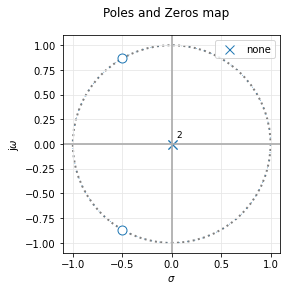

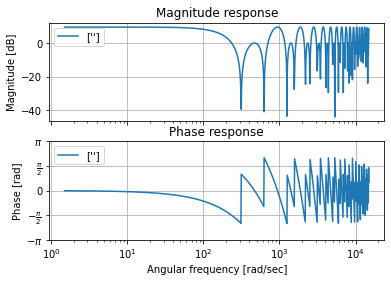

In [6]:
fs = 150

my_df = sig.TransferFunction(numz, denz, dt=1/fs)
        
pzmap(my_df, annotations = False,  fig_id=1)
        
bodePlot(my_df, fig_id=2)